# Mean-square approximation

In [3]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from matplotlib import pyplot as plt

$A$ - square matrix $[n x n]$ with **inverse** $A^{-1}$

$A$ - rectangular matrix $[m, n]$, $m > n$ with **pseudoinverse** $(A^T A)^{-1} A^T$

Solution of a given system $Ax = y$ is

$$x = A^{-1} y$$

if matrix A has inverse, or

$$x = (A^T A)^{-1} A^T y$$

if matrix A has pseudoinvers

In [4]:
# matrix A

A = np.array([[1, 2], [1, 1], [0, 2]])
A

array([[1, 2],
       [1, 1],
       [0, 2]])

In [5]:
# vector y

y = np.array([4, 5, 9]).T
y

array([4, 5, 9])

In [22]:
# Dimensions

y.shape, A.shape

((4,), (4, 2))

In [34]:
# Transpose

print('y.T: \n', y.T) #TODO y <=> y.T
print('\ny.T: \n', np.transpose(y)) #TODO y <=> y transposed)
print('\nA.T: \n', A.T) # works for matrix

y.T: 
 [ 2.6 -1.7  2.5 -1.6]

y.T: 
 [ 2.6 -1.7  2.5 -1.6]

A.T: 
 [[ 1.          1.          1.          1.        ]
 [ 0.90929743 -0.93909936  0.89336444 -0.88588921]]


### Mean-square approximation - system solving

In [10]:
LA.lstsq(A, y)

<ipython-input-10-4089b6726cf0>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  LA.lstsq(A, y)


(array([-1.33333333,  3.88888889]),
 array([13.44444444]),
 2,
 array([3.1795868 , 0.94351882]))

In [11]:
LA.lstsq(A, y.T)

<ipython-input-11-08a14160e71a>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  LA.lstsq(A, y.T)


(array([-1.33333333,  3.88888889]),
 array([13.44444444]),
 2,
 array([3.1795868 , 0.94351882]))

In [12]:
np.vstack(([2, 3], [1, 1]))

array([[2, 3],
       [1, 1]])

##### Example 1

Determine the coefs values $a$ and $b$ for function $f(x) = a + b \sin x$ using mean-square approximation for points $(2, 2.6)$, $(-1.22, -1.7)$, $(8.32, 2.5)$ and $(4.23, -1.6)$.

Give the error estimate. Plot a set of points and draw the resulting function.

In [13]:
points = [(2, 2.6), (-1.22, -1.7), (8.32, 2.5), (4.23, -1.6)]
points

[(2, 2.6), (-1.22, -1.7), (8.32, 2.5), (4.23, -1.6)]

In [14]:
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
x, y

(array([ 2.  , -1.22,  8.32,  4.23]), array([ 2.6, -1.7,  2.5, -1.6]))

In [15]:
A = np.vstack((np.ones(len(x)), np.sin(x))).T
A

array([[ 1.        ,  0.90929743],
       [ 1.        , -0.93909936],
       [ 1.        ,  0.89336444],
       [ 1.        , -0.88588921]])

In [16]:
res, rss, _, _ = LA.lstsq(A, y.T)

<ipython-input-16-96ff54db4e8b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res, rss, _, _ = LA.lstsq(A, y.T)


In [17]:
res, rss[0]

(array([0.46292444, 2.31551348]), 0.0022605727583820995)

In [18]:
linspace = np.linspace(-10, 10, 100)

In [19]:
a, b = res
a, b

(0.46292444204497935, 2.315513480740615)

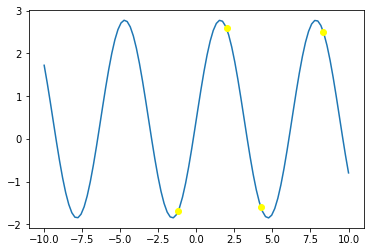

In [20]:
#plt.plot(linspace)
plt.plot(linspace, a + b * np.sin(linspace))
plt.plot(x, y, 'o', color='yellow')

# Linear regression

##### Example 1

In file advertising.csv there are info about prices (in thousands of dollars) of advertising offers in different markets.

I column - TV advertising prices

II column - radio advertising prices

III columb - newspaper advertising prices

IV - total products sold on the advertised media

Create LR model which predicts sales based on advertising prices.

In [35]:
data = pd.read_csv('data/advertising.csv', index_col=0) # fst col is for indexing
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### See if there is a relation between type of advertising and sales (column)

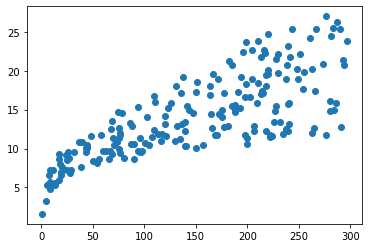

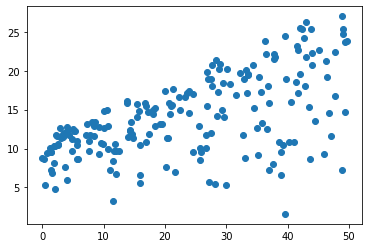

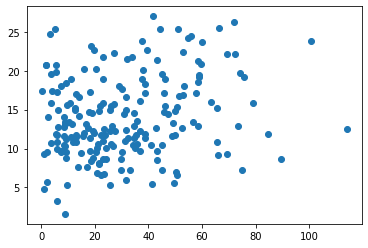

In [47]:
plt.subplot()
plt.scatter(data['TV'], data['Sales'])
plt.show()

plt.subplot()
plt.scatter(data['Radio'], data['Sales'])
plt.show()

plt.subplot()
plt.scatter(data['Newspaper'], data['Sales'])
plt.show()

- linear relaton between Sales and TV is the greatest

- linear relaton between Sales and Newspaper is the smallest

In [88]:
# Import libraries

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [62]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [63]:
# Split the data into train and test set

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 123)

# y is the real value so there is no point to do "stratify = y"

In [65]:
# Create linear model

lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)
predicted = lr.predict(test_x)

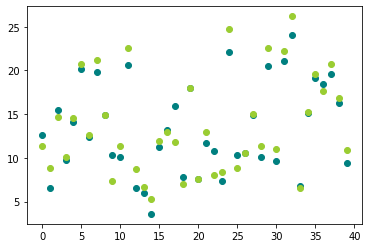

In [86]:
# Predicted vs real values of Sales

plt.scatter(np.arange(0, len(predicted)), predicted, color = 'teal')
plt.scatter(np.arange(0, len(predicted)), test_y, color = 'yellowgreen')
plt.show()

In [89]:
mse = metrics.mean_squared_error(predicted, test_y)
print('mse: ', mse)
mae = metrics.mean_absolute_error(predicted, test_y)
print('\nmae: ', mae)
r2 = metrics.r2_score(predicted, test_y)
print('\nr2: ', r2)

mse:  2.2030129791028488

mae:  1.148816096178183

r2:  0.9186533065791054


In [92]:
lr.intercept_, lr.coef_

(2.9242267872501255, array([ 0.04558897,  0.18653389, -0.00063032]))

In [112]:
# Repeat the same process but using only the most related columns 'TV' and 'Radio'

# Split the data

x_train, x_test, y_train, y_test = model_selection.train_test_split(data[['TV', 'Radio']], data['Sales'], test_size = 0.2, random_state = 123)

In [113]:
x_train.shape, y_train.shape

((160, 2), (160,))

In [114]:
# Create model

lr_2 = linear_model.LinearRegression()

# Train model

lr_2.fit(x_train, y_train)

LinearRegression()

In [115]:
# Model predict

predicted_2 = lr_2.predict(x_test)

In [117]:
mse_2 = metrics.mean_squared_error(predicted_2, y_test)
mae_2 = metrics.mean_absolute_error(predicted_2, y_test)
r2_2 = metrics.r2_score(predicted_2, y_test)
mse_2, mae_2, r2_2

(2.204166397794404, 1.1495986554854518, 0.9185890572601252)

In [118]:
lr_2.intercept_, lr_2.coef_

(2.9141806882030536, array([0.04558518, 0.18617193]))

In [127]:
# Cross-validation
# MSE is default scoring

cv = 10
scores = model_selection.cross_val_score(lr_2, data[['TV', 'Radio', 'Newspaper']], data['Sales'], cv = cv)
scores

array([0.87302696, 0.8581613 , 0.92968723, 0.89013272, 0.93146498,
       0.93138735, 0.7597901 , 0.91217097, 0.83891753, 0.92882311])

<BarContainer object of 10 artists>

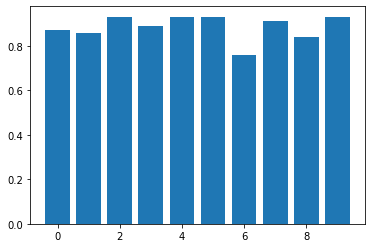

In [128]:
plt.bar(np.arange(0, cv), scores)

In [129]:
scores.mean()

0.8853562237979616

In [131]:
#TODO if x has only one column train_test_split does not work?